In [2]:
%run -n main.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
jobs = jobs_manager()

In [3]:
# cells = load_uik_tables(log_progress(urls, every=1))
# cells = list(log_progress(cells, every=1))
# dump_uik_cells(cells)

In [4]:
%run -n main.py
cells = list(load_uik_cells(UIK_CELLS_2011))

In [5]:
# cache = set(list_addresses_cache())
# addresses = sorted({_.address for _ in load_raw_uiks() if _.address is not None} - cache)
# %job geocode_addresses(log_progress(addresses, every=1))

In [6]:
%run -n main.py
addresses = list(list_addresses_cache())
address_coordinates = {_: load_coordinates(_) for _ in log_progress(addresses, every=100)}

In [7]:
%run -n main.py
uiks = list(load_uiks(address_coordinates))

In [8]:
%run -n main.py
uik_stats = list(join_uiks_cells(uiks, cells))

In [9]:
del cells
del uiks

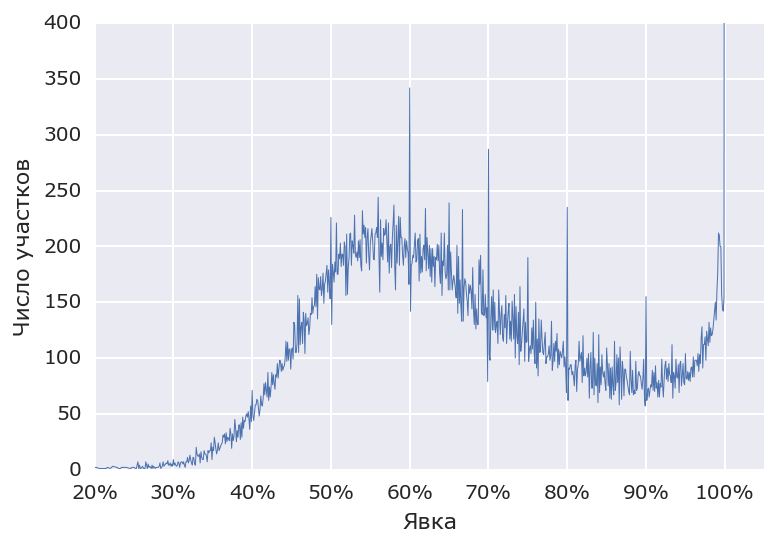

In [117]:
%run -n main.py
show_votes_share_distribution(uik_stats)

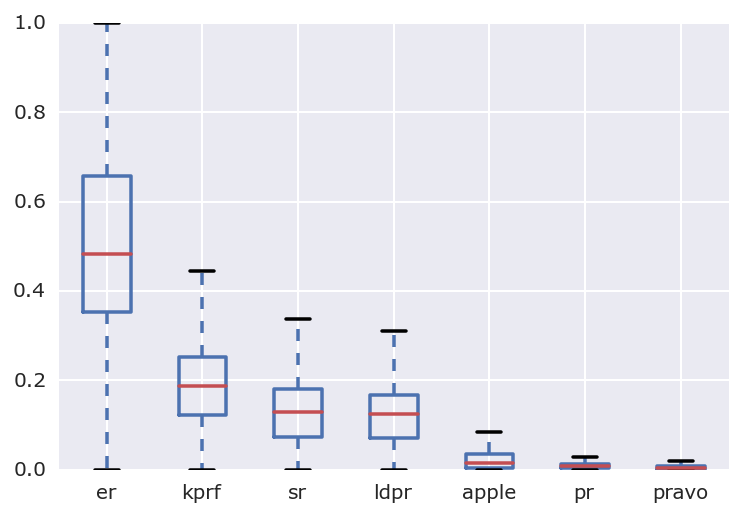

In [474]:
%run -n main.py
show_party_shares(uik_stats)

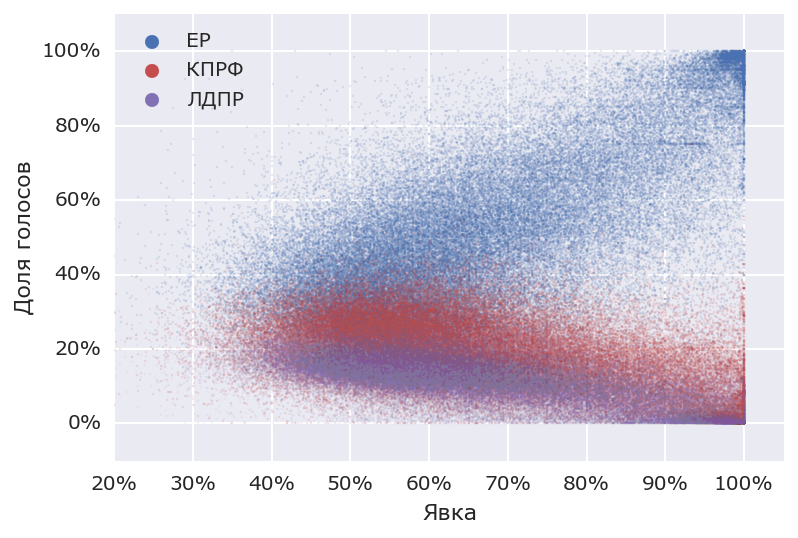

In [116]:
%run -n main.py
show_votes_share_party_share_corellation(uik_stats)

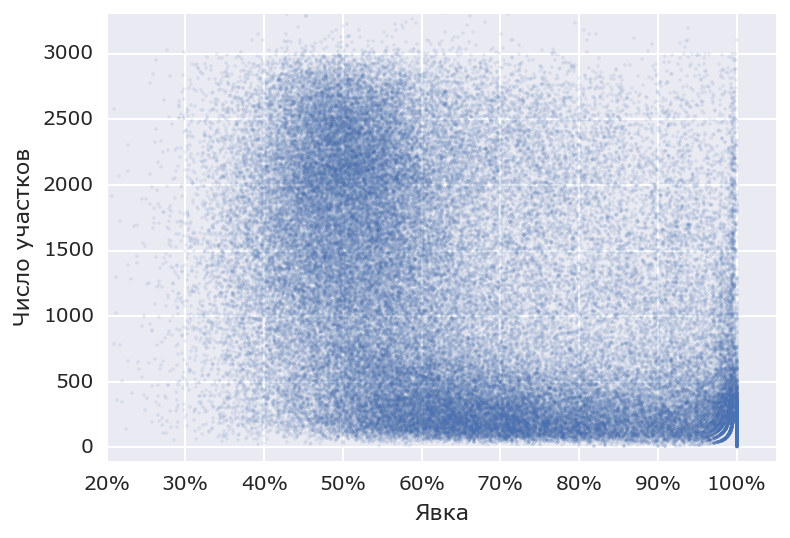

In [119]:
%run -n main.py
show_votes_share_total_corellation(uik_stats)

In [178]:
%run -n main.py
dump_map_data(uik_stats)

In [111]:
%run -n main.py
dump_data(uik_stats)

(0.0026038284632034633, 0.26865925474667474)

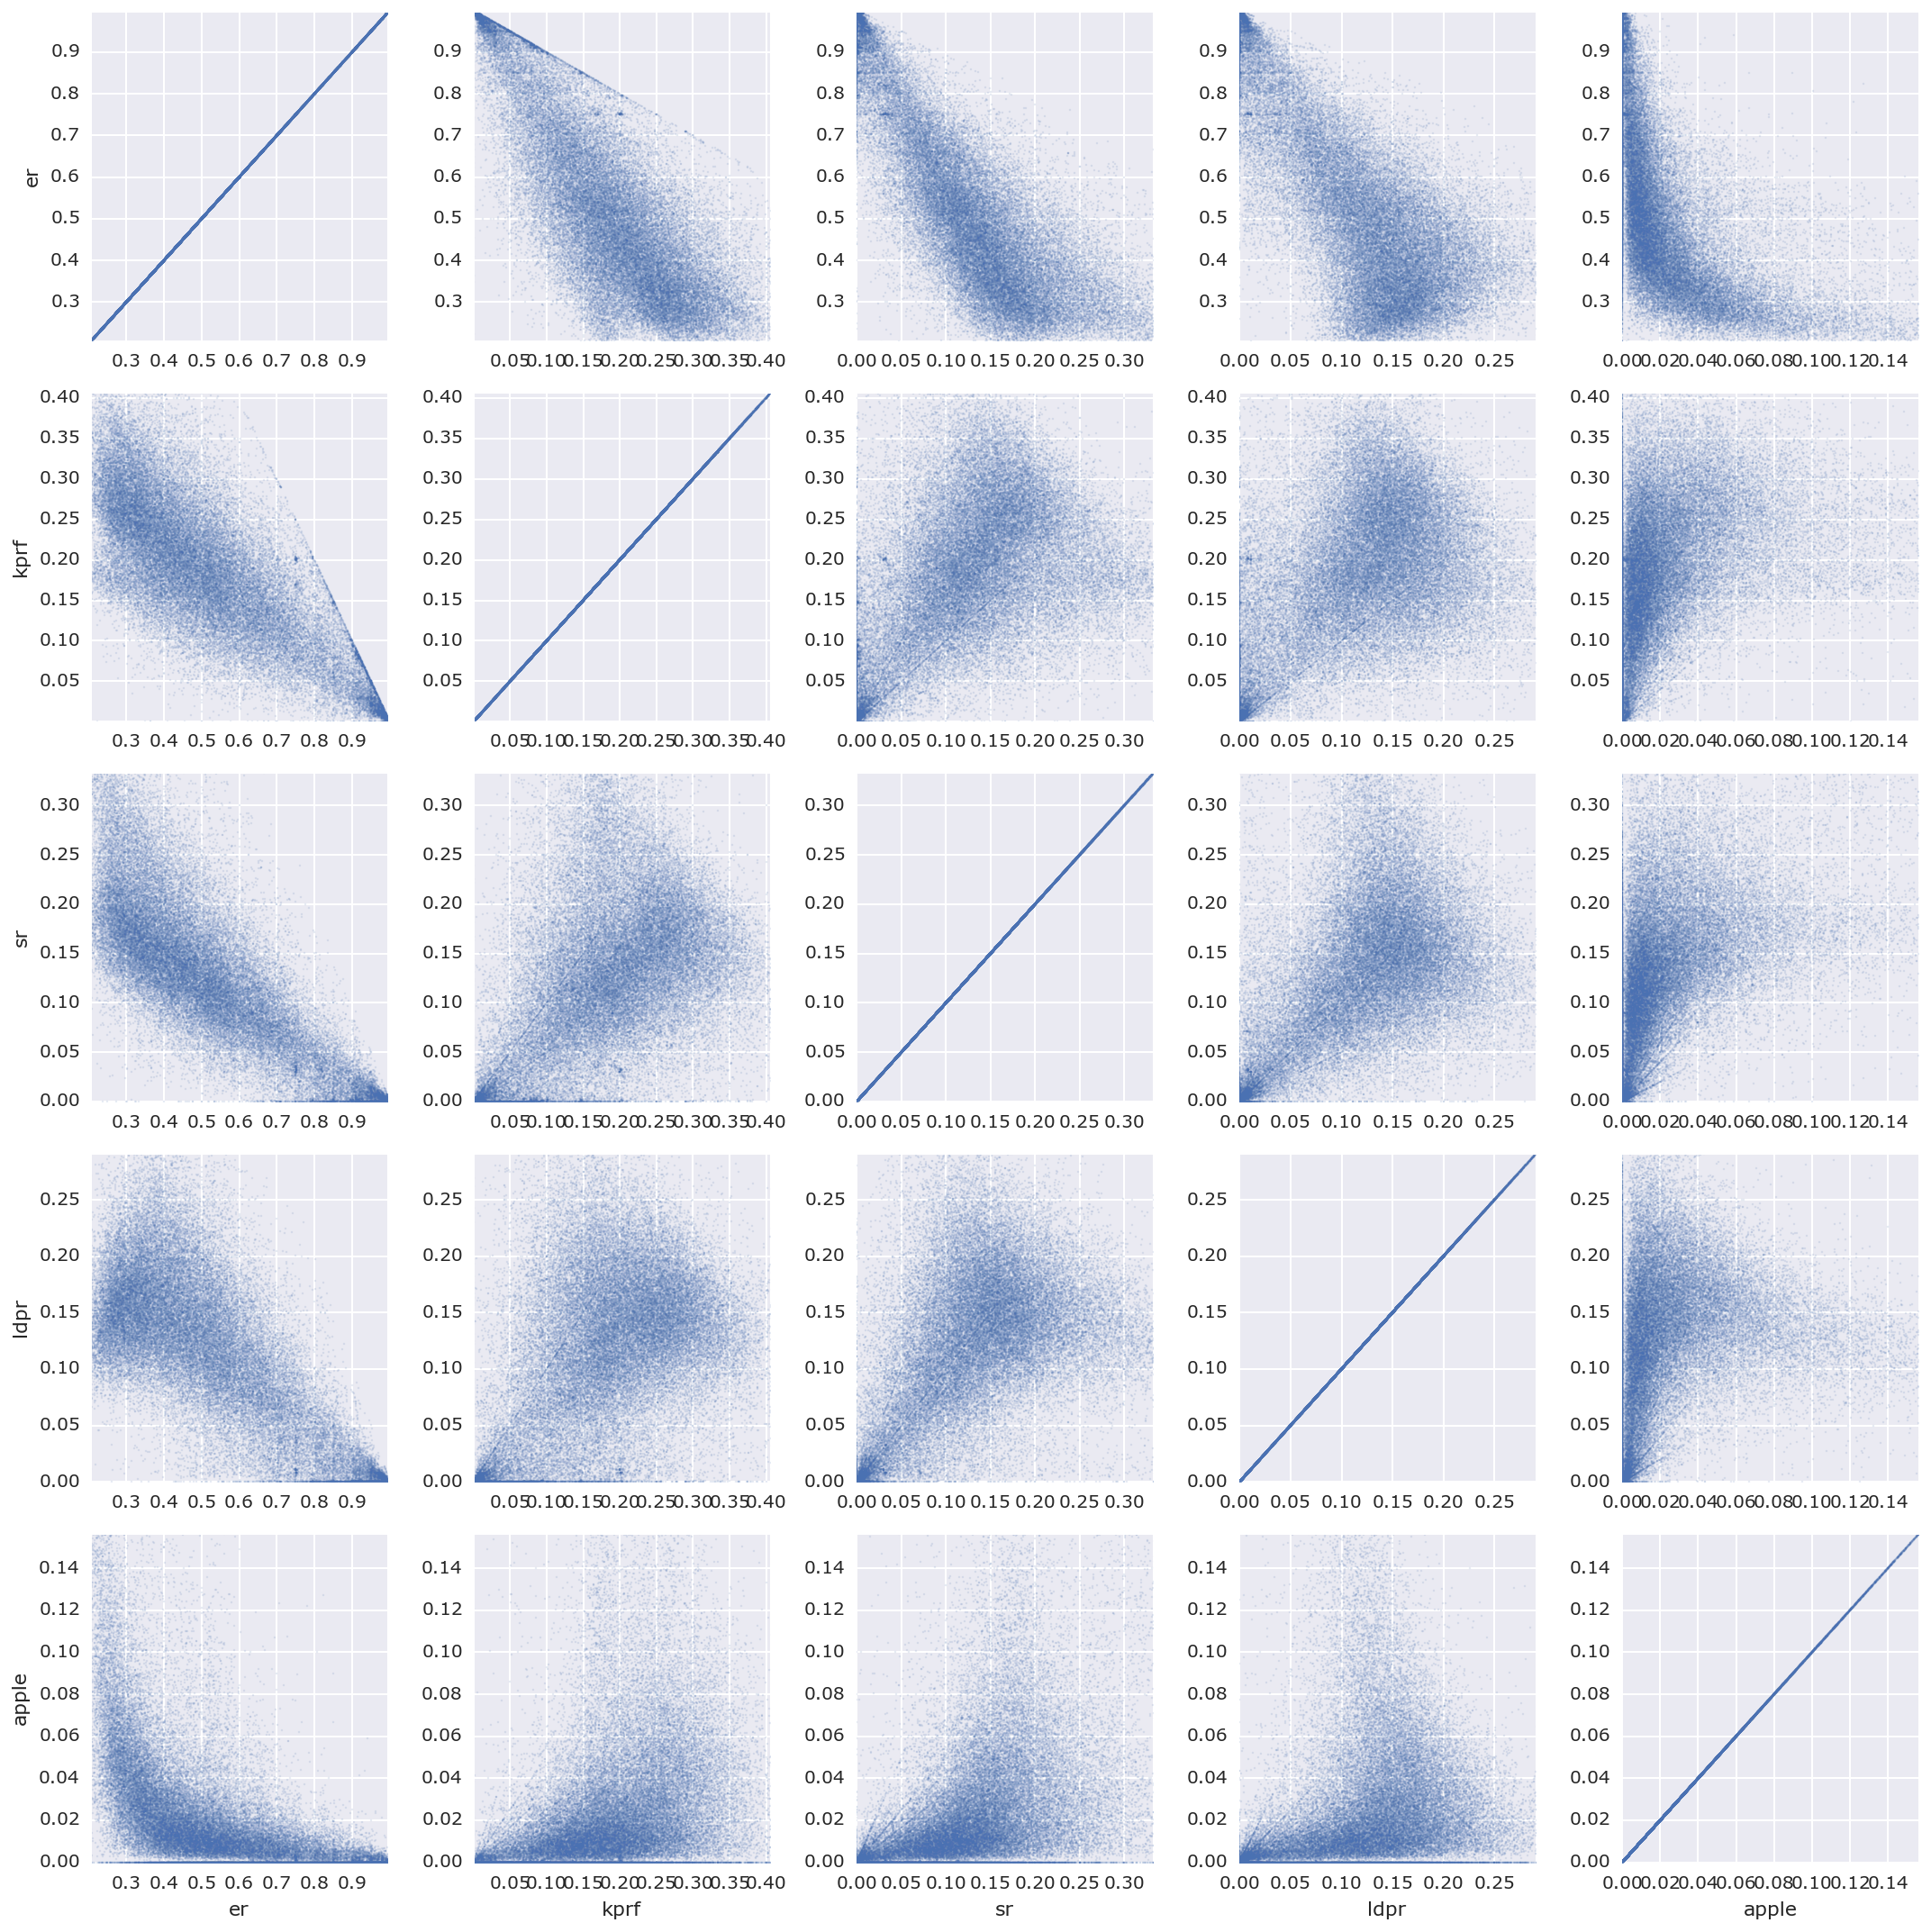

In [150]:
data = []
for uik in uik_stats:
    stats = uik.stats
    votes = stats.votes
    if votes:
        votes_for = stats.votes_for
        er = float(votes_for.er) / votes
        kprf = float(votes_for.kprf) / votes
        sr = float(votes_for.sr) / votes
        ldpr = float(votes_for.ldpr) / votes
        apple = float(votes_for.apple) / votes
        data.append((er, kprf, sr, ldpr, apple))
columns = ['er', 'kprf', 'sr', 'ldpr', 'apple']
table = pd.DataFrame(data, columns=columns)
table = table.sample(50000)
size = len(columns)
fig, axis = plt.subplots(size, size, sharex=False, sharey=False)
for x in xrange(size):
    for y in xrange(size):
        ax = axis[y][x]
        xlabel = columns[x]
        ylabel = columns[y]
        xcolumn = table[xlabel]
        ycolumn = table[ylabel]
        xlim = xcolumn.quantile([0.01, 0.99])
        ylim = ycolumn.quantile([0.01, 0.99])
        ax.scatter(xcolumn, ycolumn, color=BLUE, s=1, alpha=0.1)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        if x == 0:
            ax.set_ylabel(ylabel)
        if y == size - 1:
            ax.set_xlabel(xlabel)
fig.set_size_inches(3 * size, 3 * size)
fig.tight_layout()